<a href="https://colab.research.google.com/github/barcygan/python/blob/master/weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np

# definicja lokalizacji pliku
file = '/content/drive/My Drive/Colab Notebooks/weather.csv'

#stworzenie dataframe
df = pd.read_csv(file)

In [ ]:
#konwertowanie kolumny z datą do DATETIME
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d')

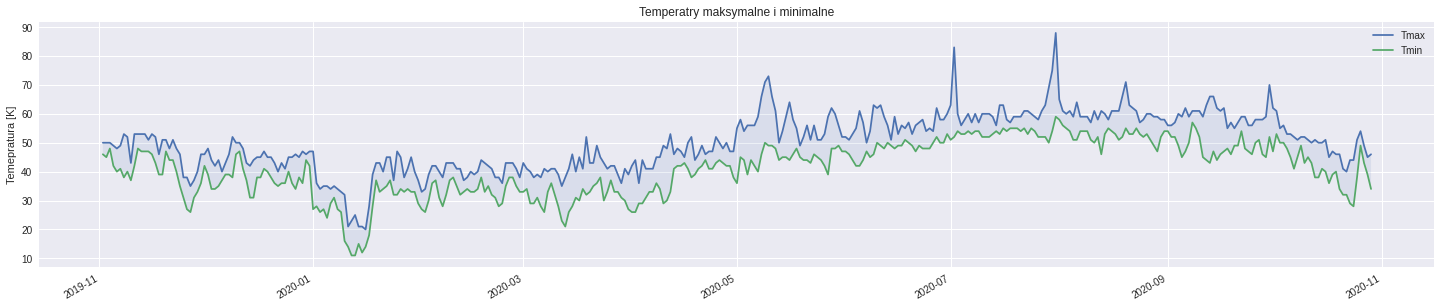

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt

#selektor okresu czasowego
df_october = df[(df['DATE'] > '2019-11-01') & (df['DATE'] < '2020-10-30')]

#definicja wykresu
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(25,5))

ax.plot(df_october['DATE']  ,df_october['TMAX'], label = 'Tmax' )
ax.plot(df_october['DATE']  ,df_october['TMIN'], label = 'Tmin' )
ax.set_title('Temperatry maksymalne i minimalne')
ax.set_xlabel('')
ax.set_ylabel('Temepratura [K]')
fig.autofmt_xdate()
ax.legend()
ax.fill_between(df_october['DATE'],df_october['TMAX'],df_october['TMIN'], alpha=0.1)

plt.show()

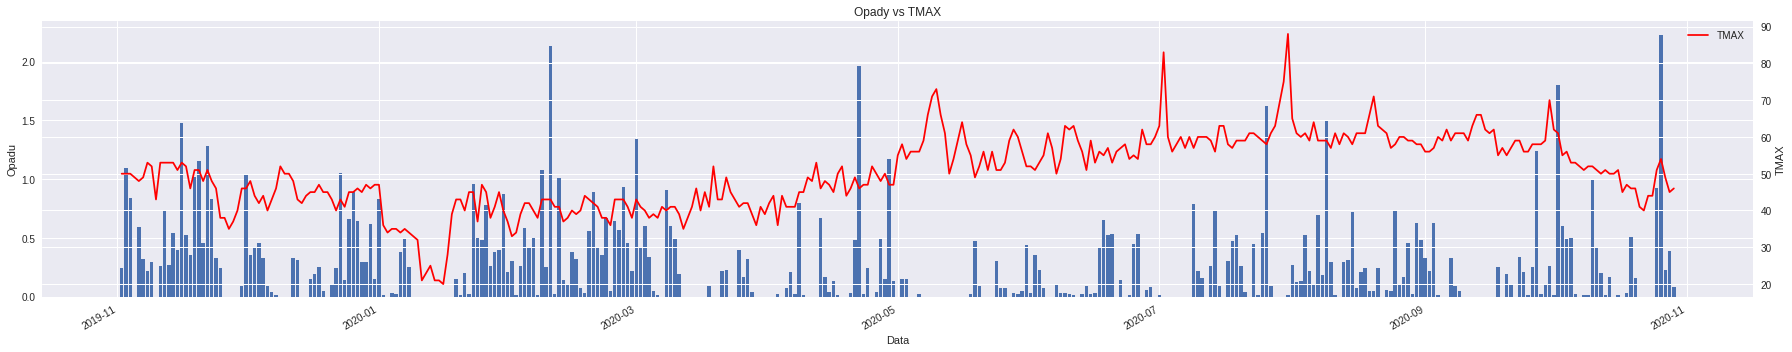

In [ ]:

fig,ax = plt.subplots(figsize=(25,5))
ax.bar(df_october['DATE'],df_october['PRCP'], label = 'Opady' )

ax.set_title('Opady vs TMAX')
ax.set_xlabel('Data')
ax.set_ylabel('Opadu')


ax2 = ax.twinx()
ax2.plot(df_october['DATE'],df_october['TMAX'], color = 'red', label = 'TMAX' )
ax2.set_ylabel('TMAX')

fig.autofmt_xdate()
fig.tight_layout()
ax2.legend()


In [ ]:
#Funkcja groupby z podstawowymi funkcjami agregującymi w ujęciu miesiąc - rok

#dataf = df.groupby([df['DATE'].dt.year.rename('ROK') ,df['DATE'].dt.month.rename('MIESIAC')])['TMAX'].agg(['mean', 'max', 'min']).reset_index()
dataf = df.groupby(df['DATE'].dt.to_period("M"))['TMAX'].agg(['mean', 'max', 'min']).reset_index()

In [ ]:
#Zmiana formatu danych 
dataf['DATE'] = dataf['DATE'].dt.strftime('%Y-%m')


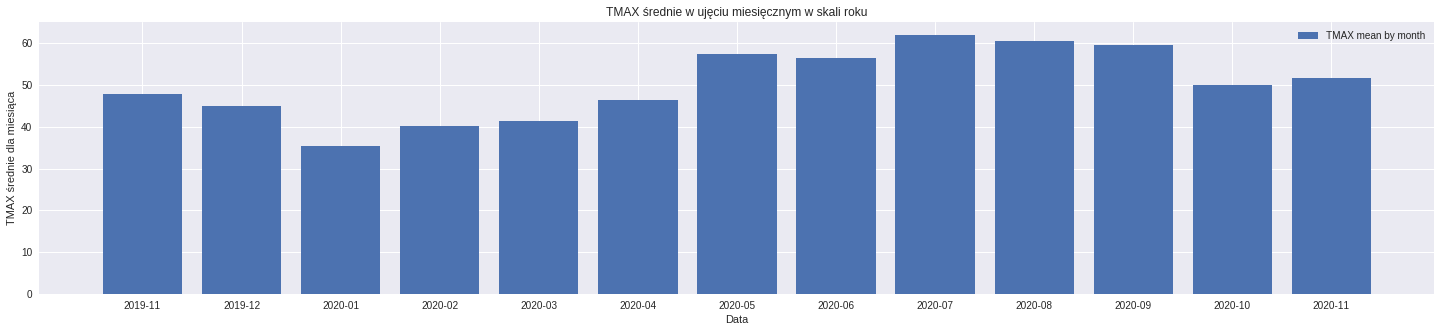

In [114]:
#Kreślenie wykresy TMAX średniej w ujęciu miesięcznym w skali roku

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(25,5))

ax.bar(dataf['DATE']  ,dataf['mean'], label = 'TMAX w ujęciu miesięcznym' )
ax.set_title('TMAX średnie w ujęciu miesięcznym w skali roku')
ax.set_xlabel('Data')
ax.set_ylabel('TMAX średnie dla miesiąca')
ax.legend()